In [15]:
# #            PACKAGES             #
###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import logging
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os




In [12]:
os.listdir()


['.config',
 'training_set_features.csv',
 'training_set_labels.csv',
 'sample_data']

In [3]:
##################################################
# T1.1.2. LOADING DATASET & EXAMINIG THE DATASET #
##################################################
from google.colab import files
uploaded = files.upload()

flu_df = pd.read_csv('training_set_features.csv')
flu_df2 = pd.read_csv('training_set_labels.csv')


Saving training_set_features.csv to training_set_features.csv
Saving training_set_labels.csv to training_set_labels.csv


In [13]:
import sys
print(sys.executable)


/usr/bin/python3


In [19]:
flu_df = pd.merge(flu_df, flu_df2, on='respondent_id', how='outer')


In [4]:
###################################
#        DIMENSIONS & INFO        #
###################################
print(flu_df.shape)
flu_df.describe()
print(f"Dataset shape: {flu_df.shape}")
print(flu_df.dtypes)


(26707, 36)
Dataset shape: (26707, 36)
respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                     

True
respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4

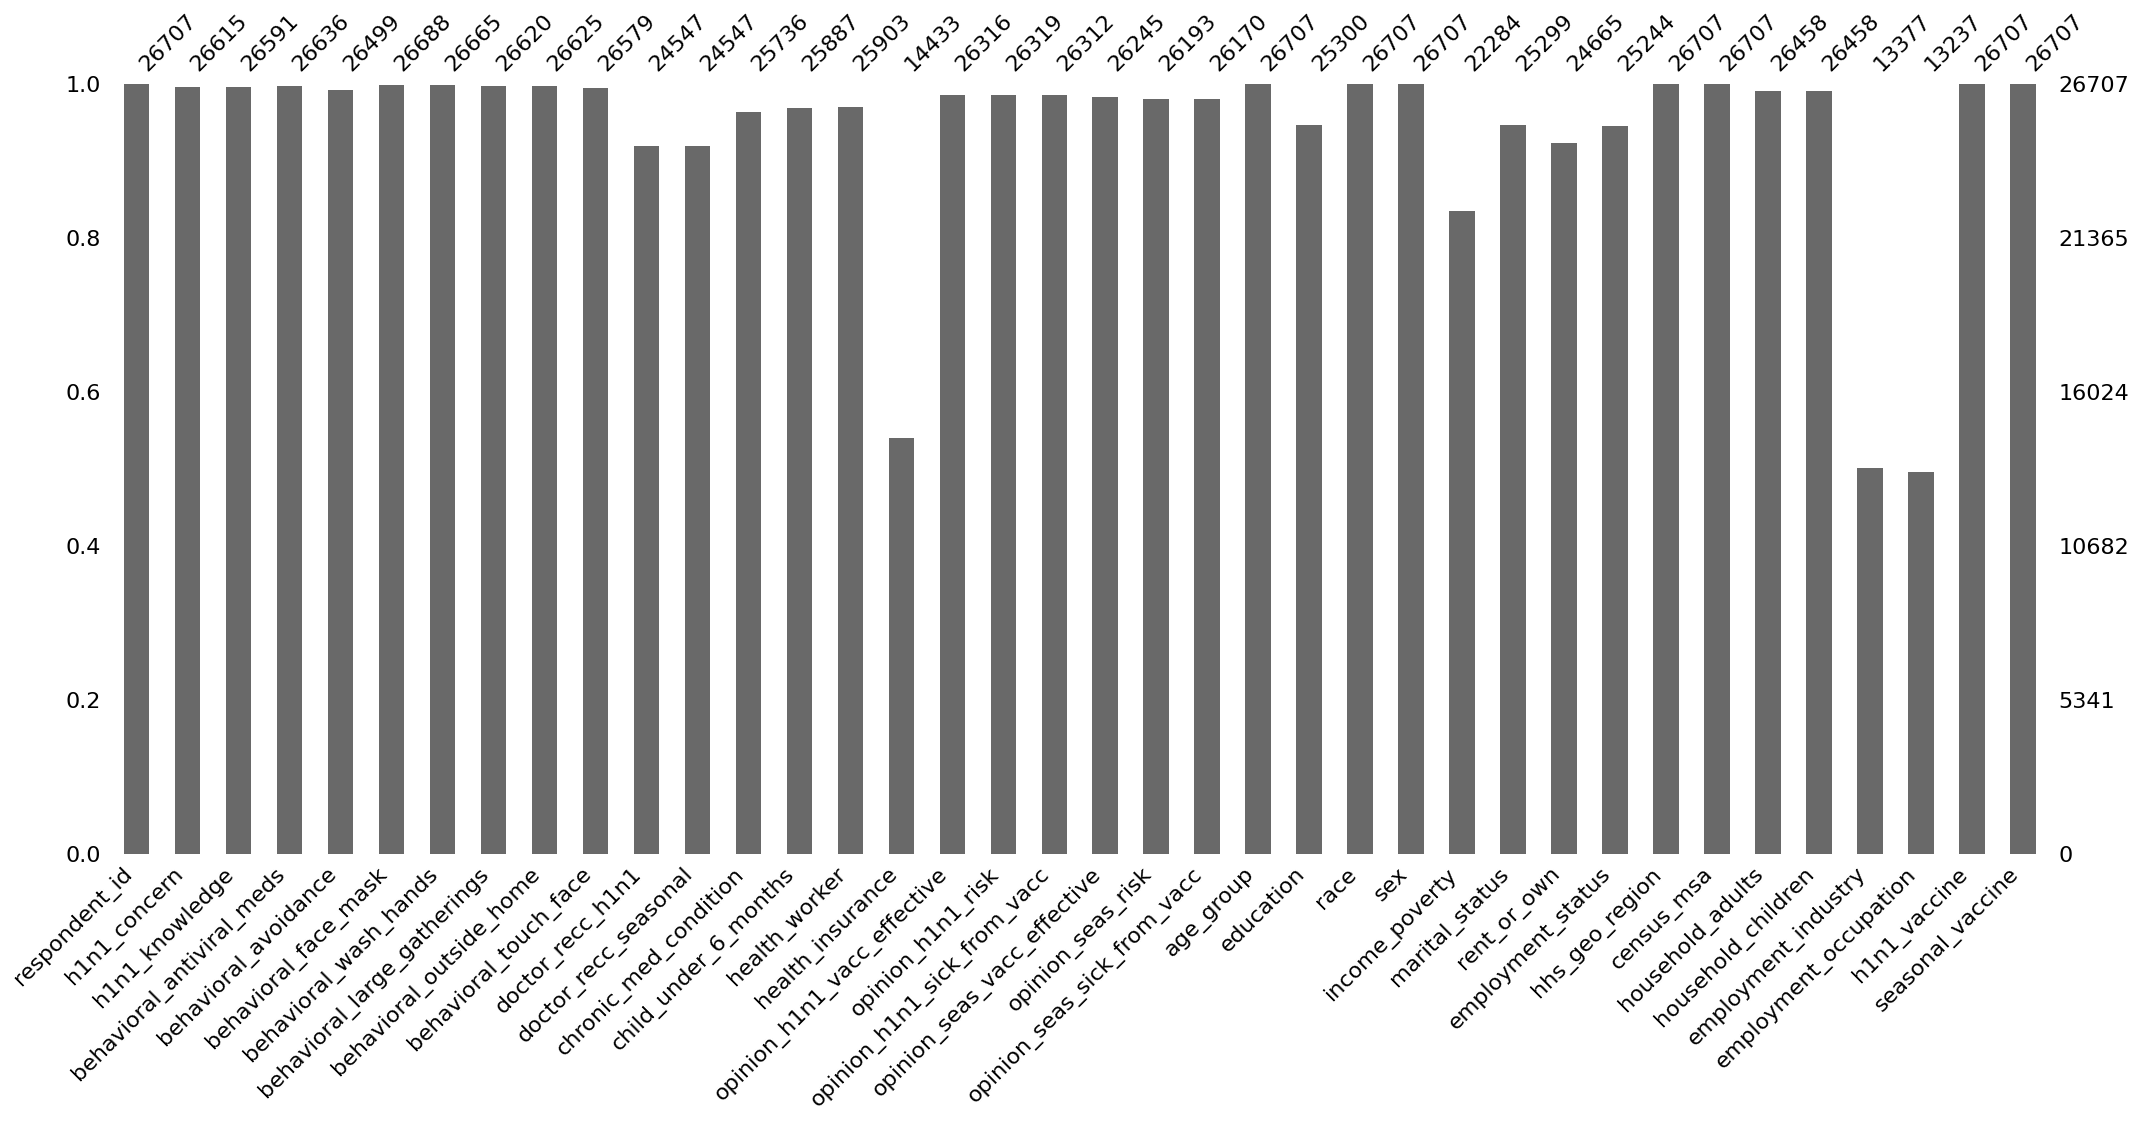

In [ ]:
###################################
#         MISSING VALUES          #
###################################
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

msno.bar(flu_df)
plt.show()


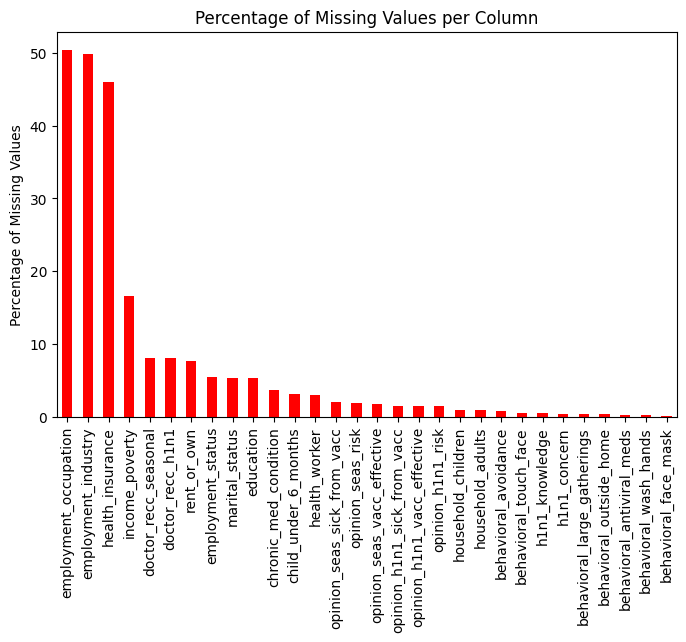

In [6]:
missing_values = (flu_df.isnull().sum() / len(flu_df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_values.plot(kind='bar', color='red')
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()


In [ ]:
###################################
#       PROFILE SUMMARY           #
###################################
import sweetviz as sv

report = sv.analyze(flu_df)
report.show_html("dataset_profile.html")



                                             |          | [  0%]   00:00 -> (? left)

Report dataset_profile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
##################################################
# T1.1.3. SUMMARY STATS FOR FEATURES             #
##################################################
cat_cols = flu_df.select_dtypes(include=['object', 'category']).columns
num_cols = flu_df.select_dtypes(include=['int64', 'float64']).columns

numeric_sum = flu_df[num_cols].describe().T
print("Summary statistics for numerical features:")
display(numeric_sum)

Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,26625.0,0.337315,0.472802,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,26579.0,0.677264,0.467531,0.0,0.0,1.0,1.0,1.0


In [10]:
categorical_sum = flu_df[cat_cols].describe().T
print("\nSummary statistics for categorical features:")
display(categorical_sum)


Summary statistics for categorical features:


,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


In [21]:
##################################################
#    VARIABLE DISTRIBUTIONS AND CLASS BALANCE    #
##################################################

print(flu_df['h1n1_vaccine'].value_counts(normalize=True) * 100)
h1n1_dist = flu_df['h1n1_vaccine'].value_counts().reset_index()
h1n1_dist.columns = ['Class', 'Count']
h1n1_dist['Percentage'] = (h1n1_dist['Count'] / h1n1_dist['Count'].sum()) * 100
print(h1n1_dist)


h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  21033   78.754634
1      1   5674   21.245366


In [22]:
print(flu_df['seasonal_vaccine'].value_counts(normalize=True) * 100)
seaonal_dist = flu_df['seasonal_vaccine'].value_counts().reset_index()
seaonal_dist.columns = ['Class', 'Count']
seaonal_dist['Percentage'] = (seaonal_dist['Count'] / seaonal_dist['Count'].sum()) * 100
print(seaonal_dist)

seasonal_vaccine
0    53.439173
1    46.560827
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  14272   53.439173
1      1  12435   46.560827


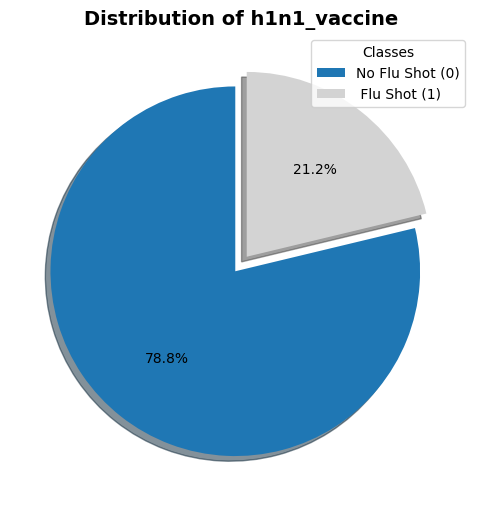

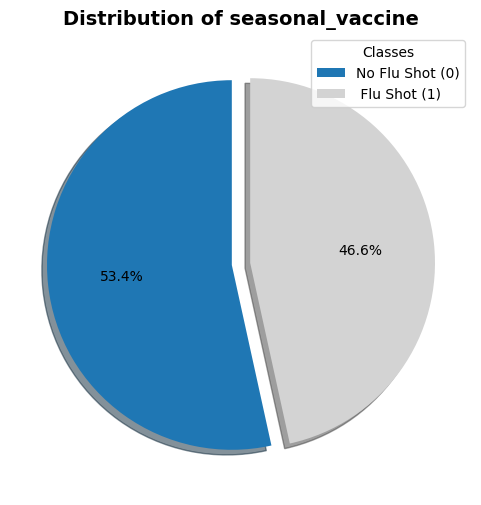

In [23]:
targets = ['h1n1_vaccine', 'seasonal_vaccine']

colors = ['#1f77b4', '#d3d3d3']
for col in targets:
    counts = flu_df[col].value_counts()

    counts = counts.sort_index()

    labels = ['No Flu Shot (0)', ' Flu Shot (1)']
    explode = [0.05] * len(counts)

    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        explode=explode,
        shadow=True
    )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.legend(wedges, labels, title="Classes", loc="upper right", fontsize=10)
    plt.show()

In [ ]:
from nbconvert import MarkdownExporter
import nbformat

with open("Flu_Shot.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

exporter = MarkdownExporter()
exporter.exclude_input = True
exporter.exclude_output_prompt = True

body, resources = exporter.from_notebook_node(nb)

with open("Flu_Shot_outputs.md", "w") as f:
    f.write(body)

print("Markdown file created with outputs only!")


Markdown file created with outputs only!


In [24]:
#Task 1.2: Data Cleaning and Preprocessing
#Ticket 1.2.1: Handle missing values
cat_cols = flu_df.select_dtypes(include=['object', 'category']).columns
num_cols = flu_df.select_dtypes(include=['int64', 'float64']).columns.drop('respondent_id', errors='ignore')
imputation_cols = num_cols.tolist() + cat_cols.tolist()
# 1. Implement Imputation Strategies
# Numeric (int/float): Median imputation is applied to ALL numerical/binary columns for consistency
num_imputer = SimpleImputer(strategy="median")
flu_df[num_cols] = num_imputer.fit_transform(flu_df[num_cols])

# Categorical (object/category): Most frequent value (mode) is used
cat_imputer = SimpleImputer(strategy="most_frequent")
flu_df[cat_cols] = cat_imputer.fit_transform(flu_df[cat_cols])

# 2. Verification Code for Imputation
print("\nVerification of Imputation (Checking remaining NaNs):")
total_na_after_imputation = flu_df[imputation_cols].isnull().sum().sum()

if total_na_after_imputation == 0:
    print("SUCCESS: All missing values in numerical and categorical features have been imputed.")
else:
    print(f"ERROR: {total_na_after_imputation} missing values remaining after imputation.")


Verification of Imputation (Checking remaining NaNs):
SUCCESS: All missing values in numerical and categorical features have been imputed.


In [25]:
#To check for missing values
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

False
respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_

In [26]:
#Ticket 1.2.2: Convert categorical variables to appropriate formats
# 1. Define Ordinal Categories and Features
# Create reusable ordered mappings for OrdinalEncoder
ordinal_features = ['age_group', 'education', 'income_poverty']
age_group_order = ['18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years']
education_order = ['< 12 Years', '12 Years', 'Some College', 'College Graduate']
income_poverty_order = ['Below Poverty', '<= $75,000, Above Poverty', '> $75,000']
ordinal_categories = [age_group_order, education_order, income_poverty_order]

# 2. Define Nominal Features
all_cat_cols_imputed = flu_df.select_dtypes(include=['object', 'category']).columns
nominal_features = [col for col in all_cat_cols_imputed if col not in ordinal_features]

# 3. Create the binary_features
binary_features = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask',
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance']
scaling_features = [col for col in num_cols if col not in binary_features]
# 4. Create the ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        # Ordinal Encoding: For ordered features
        ('ord', OrdinalEncoder(categories=ordinal_categories, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features),

        # One-Hot Encoding: For nominal features
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),

        # Passthrough: Capped Numerical Features (for subsequent scaling)
        ('num_scale', 'passthrough', scaling_features),

        # Passthrough: Binary Features (includes all 'behavioral_' columns)
        ('binary_passthrough', 'passthrough', binary_features)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)
print("ColumnTransformer created for reusable encoding for Ordinal & One-Hot")

ColumnTransformer created for reusable encoding for Ordinal & One-Hot


In [27]:
# Check for NaNs in the data
if flu_df.isna().any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nNo missing values was found.")


No missing values was found.


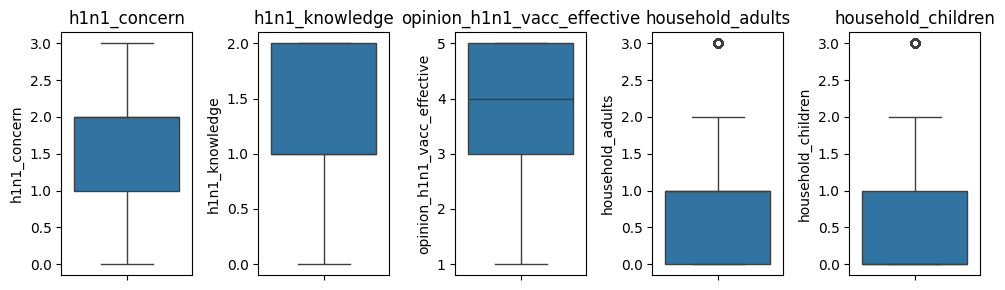

No significant outliers found for capping in column 'h1n1_concern'.
No significant outliers found for capping in column 'h1n1_knowledge'.
No significant outliers found for capping in column 'opinion_h1n1_vacc_effective'.
No significant outliers found for capping in column 'opinion_h1n1_risk'.
No significant outliers found for capping in column 'opinion_h1n1_sick_from_vacc'.
Capped 3427 outliers in column 'opinion_seas_vacc_effective' using IQR method (bounds: 2.50, 6.50).
No significant outliers found for capping in column 'opinion_seas_risk'.
Capped 6573 outliers in column 'opinion_seas_sick_from_vacc' using IQR method (bounds: -0.50, 3.50).
Capped 1125 outliers in column 'household_adults' using IQR method (bounds: -1.50, 2.50).
Capped 1747 outliers in column 'household_children' using IQR method (bounds: -1.50, 2.50).
Capped 5674 outliers in column 'h1n1_vaccine' using IQR method (bounds: 0.00, 0.00).
No significant outliers found for capping in column 'seasonal_vaccine'.


In [28]:
#Ticket 1.2.3: Visualize outliers
#Ticket 1.2.3: Visualize outliers
# Visualization: Use boxplots to visualize outliers in a few key numerical
viz_cols = ['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'household_adults', 'household_children']

plt.figure(figsize=(10, 3))
for i, col in enumerate(viz_cols):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=flu_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Statistical Method: IQR rule (1.5 * IQR)
for col in scaling_features:
    if flu_df[col].nunique() <= 2:
        print(f"Skipping '{col}' — binary/categorical (unique values: {flu_df[col].unique()})")
        continue

    Q1 = flu_df[col].quantile(0.25)
    Q3 = flu_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = ((flu_df[col] < lower_bound) | (flu_df[col] > upper_bound)).sum()

    if outliers_count > 0:
        # Treatment Strategy: Capping (Winsorization)
        flu_df[col] = np.where(flu_df[col] < lower_bound, lower_bound, flu_df[col])
        flu_df[col] = np.where(flu_df[col] > upper_bound, upper_bound, flu_df[col])
        print(f"Capped {outliers_count} outliers in '{col}' (bounds: {lower_bound:.2f}, {upper_bound:.2f}).")
    else:
        print(f"No significant outliers found for '{col}'.")

In [29]:
#Ticket 1.2.4: Normalize/standardize numerical features if appropriate
scaler = StandardScaler()

In [30]:
# Ticket 1.2.5: Create a data cleaning pipeline that can be reused for test data

# The Pipeline combines encoding/passthrough (ColumnTransformer) with scaling (StandardScaler)
preprocessing_pipeline = Pipeline(steps=[
    ('encoder', column_transformer),
    ('scaler', scaler)
])
print("preprocessing_pipeline is created.")

preprocessing_pipeline is created.
